# **Design Optimization Homework 5**

###**Problem 1**

###In the 1st sub-question we are formulating the least square problem, the  question has the equilibrium relation formula given


$$ p=x_1 exp (A_{12}(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2})^2)p_1^{sat} + x_2 exp (A_{21}(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2})^2)p_2^{sat}$$<br/>

where $p_1^{sat}=p_{water}^{sat}, p_2^{sat}=p_{1,4,dioxane}^{sat}$

###since we know the actual $p$ values,the least square problem can be given by,

$$ \underset{A_{12},A_{21}}{min}\sum_{i=1}^{11}(pf(i)-p(i))^2$$<br/>


###Solving least squares using gradient descent,

estimated A12 and A21 is  tensor([1.9418, 1.7030], requires_grad=True)
loss is  0.6950508


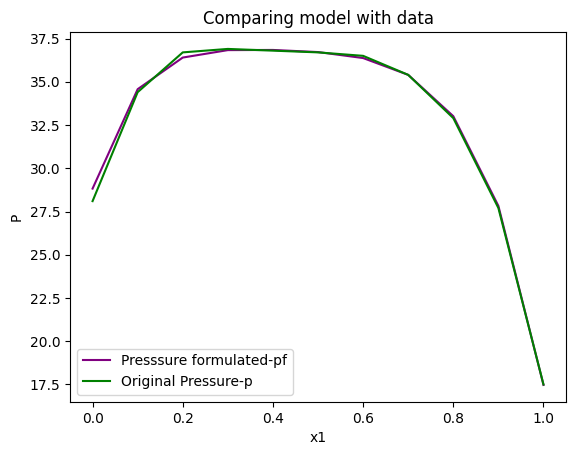

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display
x_1=np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x_2=np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])
aw=np.array([8.07131, 1730.63, 233.426])
ad=np.array([7.43155, 1554.679, 240.337])
t=20
pw=10**(aw[0]-aw[1]/(t+aw[2]))
pd=10**(ad[0]-ad[1]/(t+ad[2]))
p=np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])
p=torch.tensor(p,requires_grad=False,dtype=torch.float32)
A=Variable(torch.tensor([1.0, 1.0]),requires_grad=True)
x1=torch.tensor(x_1,requires_grad=False,dtype=torch.float32)
x2=torch.tensor(x_2,requires_grad=False,dtype=torch.float32)
a=.0001
for i in range(200):
    pf=x1*torch.exp(A[0]*(A[1]*x2/(A[0]*x1+A[1]*x2))**2)*pw + x2*torch.exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*x2))**2)*pd
    loss=(pf-p)**2
    loss=loss.sum()
    loss.backward()
    with torch.no_grad():
            A-=a*A.grad
            A.grad.zero_()
print('estimated A12 and A21 is ',A)
print('loss is ',loss.data.numpy())
pf=pf.detach().numpy()
p=p.detach().numpy()
x1= x1.detach().numpy()
plt.plot(x1,pf,label='Presssure formulated-pf',color='purple')
plt.plot(x1,p,label='Original Pressure-p',color='green')
plt.xlabel('x1')
plt.ylabel('P')
plt.legend()
plt.title('Comparing model with data')
plt.show()

###From the graph it be can seen that the model fits well with the data.

###**Problem 2**

###Bayesian Optimization using openbox solver,

In [2]:
pip install openbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 7.1 MB/s eta 0:00:00


In [3]:
import numpy as np
from openbox import Optimizer, sp

# Define Search Space
space = sp.Space()
x1 = sp.Real("x1", -3, 3, default_value=1)
x2 = sp.Real("x2", -2, 2, default_value=1)
space.add_variables([x1, x2])

# Define Objective Function
def branin(config):
    x1, x2 = config['x1'], config['x2']
    y = (4-2.1*x1**2+((x1**4)/3))*x1**2+x1*x2+(-4+4*x2**2)*x2**2
    return y

# Run
if __name__ == '__main__':
    opt = Optimizer(branin, space, max_runs=50, task_id='quick_start')
    history = opt.run()
    print(history)

[2023-11-28 00:30:16,046][quick_start][INFO][color_logger.py:203] Logfile: /content/logs/quick_start_2023-11-28-00-30-16-044825.log
[2023-11-28 00:30:16,090][quick_start][INFO][generic_advisor.py:157] [BO auto selection]  surrogate_type: gp. acq_type: ei. acq_optimizer_type: random_scipy.
  0%|          | 0/50 [00:00<?, ?it/s][2023-11-28 00:30:16,172][quick_start][WARNING][util_funcs.py:126] Provide result as <dict> that contains "objectives" is recommended, got <class 'float'>
[2023-11-28 00:30:16,199][quick_start][WARNING][util_funcs.py:73] The shape of objectives is changed from () to (1,).
[2023-11-28 00:30:16,227][quick_start][INFO][generic_smbo.py:295] Iter 1, objectives: [3.2333333333333334].
[2023-11-28 00:30:16,252][quick_start][WARNING][util_funcs.py:126] Provide result as <dict> that contains "objectives" is recommended, got <class 'float'>
[2023-11-28 00:30:16,273][quick_start][WARNING][util_funcs.py:73] The shape of objectives is changed from () to (1,).
[2023-11-28 00:30:

+-------------------------+---------------+
| Parameters              | Optimal Value |
+-------------------------+---------------+
| x1                      | -0.133417     |
| x2                      | 0.705393      |
+-------------------------+---------------+
| Optimal Objective Value | -1.023551     |
+-------------------------+---------------+
| Num Trials              | 50            |
+-------------------------+---------------+


### Therefore, among 50 iterations,the minimum objective value is -1.023551 and the corresponding x1 and x2 are -0.133417  and 0.705393   respectively

###Now we are using a different Bayesian Optimization solver(Thomas Huijskens),

In [4]:
import numpy as np
import sklearn.gaussian_process as gp

from scipy.stats import norm
from scipy.optimize import minimize

def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):


    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement


def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):

    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x


def bayesian_optimisation(n_iters, sample_loss, bounds, x0=None, n_pre_samples=5,
                          gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7):


    x_list = []
    y_list = []

    n_params = bounds.shape[0]

    if x0 is None:
        for params in np.random.uniform(bounds[:, 0], bounds[:, 1], (n_pre_samples, bounds.shape[0])):
            x_list.append(params)
            y_list.append(sample_loss(params))
    else:
        for params in x0:
            x_list.append(params)
            y_list.append(sample_loss(params))

    xp = np.array(x_list)
    yp = np.array(y_list)

    # Create the GP
    if gp_params is not None:
        model = gp.GaussianProcessRegressor(**gp_params)
    else:
        kernel = gp.kernels.Matern()
        model = gp.GaussianProcessRegressor(kernel=kernel,
                                            alpha=alpha,
                                            n_restarts_optimizer=10,
                                            normalize_y=True)

    for n in range(n_iters):

        model.fit(xp, yp)

        # Sample next hyperparameter
        if random_search:
            x_random = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(random_search, n_params))
            ei = -1 * expected_improvement(x_random, model, yp, greater_is_better=True, n_params=n_params)
            next_sample = x_random[np.argmax(ei), :]
        else:
            next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, bounds=bounds, n_restarts=100)

        # Duplicates will break the GP. In case of a duplicate, we will randomly sample a next query point.
        if np.any(np.abs(next_sample - xp) <= epsilon):
            next_sample = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds.shape[0])

        # Sample loss for new set of parameters
        cv_score = sample_loss(next_sample)

        # Update lists
        x_list.append(next_sample)
        y_list.append(cv_score)

        # Update xp and yp
        xp = np.array(x_list)
        yp = np.array(y_list)

    return xp, yp
def sample_loss(params):
    return (4 - 2.1 * params[0] ** 2 + ((params[0] ** 4 )/ 3)) * params[0] ** 2 + params[0] * params[1] + (-4 + 4 * params[1] ** 2) * params[1] ** 2
bounds = np.array([[-3, 3], [-2, 2]])
xp, yp = bayesian_optimisation(n_iters=20,sample_loss=sample_loss,bounds=bounds,n_pre_samples=30,random_search=50000)
print('Minimum objective value:',np.min(yp))
print('Corresponding x1,x2:',xp[np.argmin(yp)])
print('Function value',yp,'x values', xp,)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Minimum objective value: -0.9454343271574418
Corresponding x1,x2: [ 0.14855627 -0.80457287]
Function value [  3.51462782   0.7372978    3.32180159  45.19035582  13.1730827
   2.1738586   -0.94543433   1.78728046  84.67082976   4.63923862
  48.50314798  13.46651923  28.20311833  17.73217646   2.33562317
  19.77505916  39.11564678   0.40036156  13.9305759   18.04167303
  12.86656053  -0.62170355   0.44386743   1.80288839   2.72669295
   2.18038435  15.51994852   2.9106365    0.78556735   4.30543268
 115.86403873 140.04686007 145.12166286 148.43629997 148.67337837
 157.03025642 127.08816847 140.4391761  158.2960572  159.31011799
 160.62377947 158.32889767 141.04519491 128.90711181 161.12294472
 104.89729049 108.65375306 106.6351427  107.24313185 145.14631001] x values [[ 1.5515694  -1.24117757]
 [-0.61285028  0.29024929]
 [ 1.3071223   0.95864438]
 [ 2.44052114 -1.81028698]
 [ 1.4518206  -1.54388965]
 [-0.94508853 -0.19306161]
 [ 0.14855627 -0.80457287]
 [ 1.457978   -0.1941598 ]
 [-2.781

###**Problem 3**

### 1. What are your design variables, constraints, and objectives?
--> Designing variables - Inner disc radius, Outer disc radius, Thickness;

Objective - $min (σ_{max})$ where $σ_{max}$ is the maximum von mises stress

Constraints - g1 : −P1 ≤ −66;
g2 : P1 ≤ 90;
g3 : −P2 ≤ −124;
g4 : P2 ≤ 150;
g5 : −P3 ≤ −5;
g6 : P3 ≤ 27;
g7 : S ≤ 14MP a

### 2. What design of experiment method do you use?
--> Box-Behnken Design:

1.    A type of response surface design that requires fewer experimental runs than a central composite design.
2.    Efficient for fitting second-order models while avoiding the need for extreme factor levels.

### 3. What response surface method do you use?
-->Kriging (Gaussian Process Regression):

1.    Kriging is a powerful technique for response surface modeling.
2.    It provides predictions along with uncertainty estimates.
3.    Especially useful when the response surface is complex or exhibits non-linear behavior.

###4. How do you validate your response surface?
-->Statistical Measures:

1.    Utilize statistical measures such as R-squared (coefficient of determination), root mean square error (RMSE), or mean absolute error (MAE) to quantify the goodness of fit.
2.   Assess whether the response surface adequately captures the variability in the actual data.

###5. What optimization method do you use?
-->Response Surface Methodology (RSM):

1.   Uses statistical models to approximate the response surface and guide the search for optimal solutions.
2.   Combines experimental design and statistical analysis.


###6. How do you validate your optimal solution?
--->Comparative Analysis:

1.   Compare the optimal solution with alternative designs or existing solutions.
2.   Evaluate factors such as weight, cost, and thermal performance in addition to stress levels.